In [1]:
import wfdb

# 设置数据路径和记录名
data_path = 'data/non-eeg-dataset-for-assessment-of-neurological-status-1.0.0/'
record_name1 = 'Subject1_AccTempEDA' #第一位实验者的三轴加速度，体温，心率
record_name2 = 'Subject1_SpO2HR' #第一位实验者的血氧饱和度，皮电反应

# 读取数据
signals1, fields1 = wfdb.rdsamp(data_path + record_name1)
signals2, fields2 = wfdb.rdsamp(data_path + record_name2)

type(signals1)

numpy.ndarray

In [2]:
# 查看信号数据的形状和前几行
print("第一位实验者的三轴加速度，体温，皮电反应")
print("Shape of signals:", signals1.shape)
print("First few rows of signals:")
print(signals1[:5])  # 输出前几行数据
print()

# 查看字段（元数据）信息
print("Fields:")
print(fields1)

print("\n")

# 查看信号数据的形状和前几行
print("第一位实验者的血氧饱和度，心率")
print("Shape of signals:", signals2.shape)
print("First few rows of signals:")
print(signals2[:5])  # 输出前几行数据
print()

# 查看字段（元数据）信息
print("Fields:")
print(fields2)

第一位实验者的三轴加速度，体温，皮电反应
Shape of signals: (18343, 5)
First few rows of signals:
[[ 0.7600148  -0.86998993 -0.10000427 30.10004273  0.0830394 ]
 [ 0.77002503 -0.86998993 -0.11003052 30.10004273  0.08102847]
 [ 0.75000458 -0.86998993 -0.10000427 30.10004273  0.08102847]
 [ 0.77002503 -0.86998993 -0.10000427 30.10004273  0.07901755]
 [ 0.75000458 -0.86998993 -0.10000427 30.10004273  0.08102847]]

Fields:
{'fs': 8, 'sig_len': 18343, 'n_sig': 5, 'base_date': None, 'base_time': None, 'units': ['NU', 'NU', 'NU', 'degC', 'NU'], 'sig_name': ['ax', 'ay', 'az', 'temp', 'EDA'], 'comments': ['age: 30', 'gender: M', 'height/cm: 177', 'weight/kg: 94']}


第一位实验者的血氧饱和度，心率
Shape of signals: (2299, 2)
First few rows of signals:
[[96.99996948 89.00076296]
 [96.99996948 88.00013733]
 [96.99996948 87.00044252]
 [96.99996948 87.00044252]
 [96.99996948 87.00044252]]

Fields:
{'fs': 1, 'sig_len': 2299, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['%', 'bpm'], 'sig_name': ['SpO2', 'hr'], 'comments':

## 考虑预测的生理指标是温度temp，皮电反应EDA，血氧饱和度Spo2，心率hr
考虑到我们在project1中已经完成了采集，我们直接沿用project1的代码

In [3]:
import wfdb
import numpy as np

# 设置数据路径和记录名
data_path = 'data/non-eeg-dataset-for-assessment-of-neurological-status-1.0.0/'

def process_subject_data(subject_id):
    # 读取 AccTempEDA 数据
    record_name_AccTempEDA = f'Subject{subject_id}_AccTempEDA'
    signals_AccTempEDA, _ = wfdb.rdsamp(data_path + record_name_AccTempEDA)
    # 转置数据
    transposed_data = np.transpose(signals_AccTempEDA)
    # 分割数据为8份并去除指定部分
    num_features, num_samples = transposed_data.shape
    num_segments = 8

    # 创建一个存储分割后数据的列表
    segments = []

    for i in range(num_segments):
        start_idx = i * (num_samples // num_segments)
        end_idx = (i + 1) * (num_samples // num_segments) if i != num_segments - 1 else None
        segment = transposed_data[:, start_idx:end_idx]
    
        if (i + 1) % 3 != 0:  # 去除第3, 6, 8份
            segments.append(segment)

    # 合并剩余的数据
    processed_data = np.concatenate(segments, axis=1)
    return processed_data

# 处理每个测试者的数据并打印形状
num_subjects = 20
processed_subjects_data = [process_subject_data(i) for i in range(1, num_subjects + 1)]

# 计算最小的段数
min_num_segments = min(processed_data.shape[1] for processed_data in processed_subjects_data)

# 裁剪每个测试者的数据以匹配最小的段数
processed_subjects_data = [data[:, :min_num_segments] for data in processed_subjects_data]

# 拼接处理后的数据并按要求重新组合
final_data = np.concatenate(processed_subjects_data, axis=1)
print("final_data shape:", final_data.shape)


final_data shape: (5, 272660)


In [4]:
def process_subject_data_spo2(subject_id):
    # 读取 SPO2 数据
    record_name_spo2 = f'Subject{subject_id}_SpO2HR'
    signals_spo2, _ = wfdb.rdsamp(data_path + record_name_spo2)
    # 转置数据
    transposed_data = np.transpose(signals_spo2)
    # 分割数据为8份并去除指定部分
    num_features, num_samples = transposed_data.shape
    num_segments = 8

    # 创建一个存储分割后数据的列表
    segments = []

    for i in range(num_segments):
        start_idx = i * (num_samples // num_segments)
        end_idx = (i + 1) * (num_samples // num_segments) if i != num_segments - 1 else None
        segment = transposed_data[:, start_idx:end_idx]
    
        if (i + 1) % 3 != 0:  # 去除第3, 6, 8份
            segments.append(segment)

    # 合并剩余的数据
    processed_data = np.concatenate(segments, axis=1)
    return processed_data

# 处理每个测试者的数据并打印形状
num_subjects = 20
processed_subjects_data = [process_subject_data_spo2(i) for i in range(1, num_subjects + 1)]

# 计算最小的段数
min_num_segments = min(processed_data.shape[1] for processed_data in processed_subjects_data)

# 裁剪每个测试者的数据以匹配最小的段数
processed_subjects_data = [data[:, :min_num_segments] for data in processed_subjects_data]

final_data_spo2 = np.concatenate(processed_subjects_data, axis=1)
print("final_data_spo2 shape:", final_data_spo2.shape)


final_data_spo2 shape: (2, 34200)


In [5]:
from scipy.interpolate import InterpolatedUnivariateSpline

# 目标列数
target_columns = 272660

# 创建原始和目标索引
original_indices = np.linspace(0, 1, final_data_spo2.shape[1])
target_indices = np.linspace(0, 1, target_columns)

# 初始化插值结果数组
interpolated_data = np.zeros((final_data_spo2.shape[0], target_columns))

# 对每一行进行样条插值
for i in range(final_data_spo2.shape[0]):
    # 创建样条插值器
    interpolator = InterpolatedUnivariateSpline(original_indices, final_data_spo2[i, :])
    
    # 使用插值器获取新的值
    interpolated_data[i, :] = interpolator(target_indices)

# 验证新数据的形状
print('interpolated_data shape: ',interpolated_data.shape)



interpolated_data shape:  (2, 272660)


In [6]:
# 将两个数组沿第一个轴（行）拼接
combined_data = np.vstack((final_data, interpolated_data))

# 验证拼接后的数据形状
combined_data.shape

(7, 272660)

In [7]:
combined_data[5,:]

array([96.99996948, 96.99495371, 96.99195157, ..., 97.99993896,
       97.99993896, 97.99993896])

接下来就提取出：温度temp，皮电反应EDA，血氧饱和度Spo2，心率hr,分别对应combined_data的四五六七行

In [8]:
temp = combined_data[3,:]
EDA = combined_data[4,:]
spo2 = combined_data[5,:]
hr = combined_data[6,:]

In [9]:
spo2

array([96.99996948, 96.99495371, 96.99195157, ..., 97.99993896,
       97.99993896, 97.99993896])

## 平稳性检验
假设一个时间序列的波动曲线是不稳定的，那么利用最近一段时间的观测值去预测后一段时期时序数据的变化趋势是不可能的，因此在进行时间序列建模之前，需要对时间序列进行平稳性检验

可综合PAF和PACF来进行平稳性检验。PCF与PACF检验平稳性是通过观测多阶PAF和PACF系数的变化来进行直观判断

生理参数PACF图出现明显的截尾现象，即在某阶之后偏自相关系数迅速衰减为0。

ADF检验（Augmented Dickey-Fuller test），通常称为单位根（Unit root）检验，是更为严肃的统计检验方法

当显著性检验统计量T检验值（Test statistic）低于1%、5%、10%等某个选定的临界值，则认为该序列为平稳时间序列

C:\Users\31944\.conda\envs\pytorch_beginner\lib\site-packages\ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\31944\.conda\envs\pytorch_beginner\lib\site-packages\ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\31944\.conda\envs\pytorch_beginner\lib\site-packages\ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significa

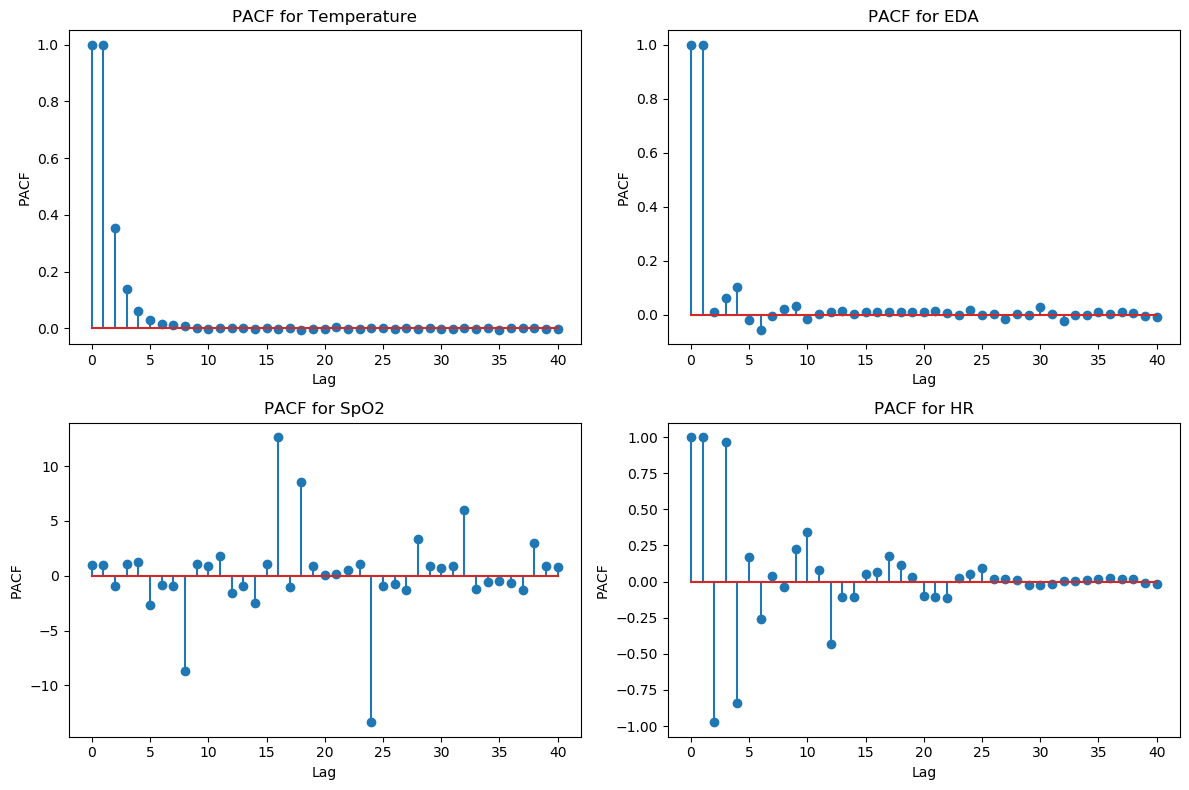

,ADF Statistic,p-value,Critical Values 1%,Critical Values 5%,Critical Values 10%
Temperature,-7.761638,9.420572e-12,-3.430374,-2.861551,-2.566776
EDA,-3.682897,4.360257e-03,-3.430374,-2.861551,-2.566776
SpO2,-13.076420,1.909965e-24,-3.430374,-2.861551,-2.566776
HR,-10.240024,4.776424e-18,-3.430374,-2.861551,-2.566776


In [37]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, pacf
import matplotlib.pyplot as plt

# 创建一个空的DataFrame来存储ADF检验结果
adf_results_df = pd.DataFrame(columns=['ADF Statistic', 'p-value', 'Critical Values 1%', 'Critical Values 5%', 'Critical Values 10%'])

# 准备绘制PACF图的subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()  # 将2x2的axes数组转换成一维数组，方便迭代

# 对每个指标进行ADF检验和PACF图绘制
for i, (indicator, data) in enumerate(zip(['Temperature', 'EDA', 'SpO2', 'HR'], [temp, EDA, spo2, hr])):
    # ADF检验
    adf_test = adfuller(data)
    adf_results_df.loc[indicator] = [adf_test[0], adf_test[1]] + [adf_test[4][key] for key in ['1%', '5%', '10%']]

    # 绘制PACF图
    pacf_values = pacf(data, nlags=40)
    axes[i].stem(pacf_values)
    axes[i].set_title(f'PACF for {indicator}')
    axes[i].set_xlabel('Lag')
    axes[i].set_ylabel('PACF')

plt.tight_layout()
plt.show()

adf_results_df


尽管所有的生理指标的p值都小于1%，这说明我们有超过99%的概率认为它们是平稳的时间序列。但是考虑到EDA的数量级比其他指标要大的多，因此我们考虑仅仅使用温度，血氧饱和度，心率来预测

# 数据预处理

In [10]:
# 对每个特征（即每行）进行 z-score 标准化
combined_data_normalized = np.zeros_like(combined_data)
for i in range(combined_data.shape[0]):  # 遍历每行（特征）
    feature = combined_data[i, :]
    mean = np.mean(feature)
    std = np.std(feature)
    combined_data_normalized[i, :] = (feature - mean) / std  # 添加平滑项以防止除以零

print("combinded_data_normalized shape: ",combined_data_normalized.shape)

combinded_data_normalized shape:  (7, 272660)


In [11]:
temp = combined_data[3,:]
spo2 = combined_data[5,:]
hr = combined_data[6,:]
temp_mean,temp_std = np.mean(temp),np.std(temp)
spo2_mean,spo2_std = np.mean(spo2),np.std(spo2)
hr_mean,hr_std = np.mean(hr),np.std(hr)


In [12]:
temp = combined_data_normalized[3,:]
spo2 = combined_data_normalized[5,:]
hr = combined_data_normalized[6,:]

### 时间滑窗处理数据

In [13]:
def create_supervised_data(X, time_steps):
    """
    将时序数据转换为有监督学习格式。

    参数:
    X: numpy array，原始时间序列数据，形状为 (n_samples, n_features)
    time_steps: 整数，时间窗口的大小

    返回:
    Xs, ys: 转换后的X和y数据，用于有监督学习
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(X[i + time_steps])
    return np.array(Xs), np.array(ys)

# 合并三个指标
X = np.column_stack((temp, spo2, hr))

# 定义时间窗口大小
T = 40

# 调用函数创建有监督学习数据
X_supervised, y_supervised = create_supervised_data(X, T)



In [14]:
# 输出转换后的数据形状
X_supervised.shape, y_supervised.shape
# print(type(X_supervised))
# (272620, 40, 3) 3代表特征通道也就是3个特征，272620代表滑窗生成的序列数，40代表一个序列数中的样本点个数
# (272620, 3) 即代表每个滑窗生成的序列数的标签（预测值）

((272620, 40, 3), (272620, 3))

# 模型构建

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split

### 定义网络结构

In [16]:
# 定义LSTM模型
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, dropout_rate):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim

        # 定义两个LSTM层
        self.lstm1 = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.lstm2 = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.dropout2 = nn.Dropout(dropout_rate)
        
        # 定义全连接层
        self.dense = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        # LSTM 1
        x, _ = self.lstm1(x)
        x = self.dropout1(x)
        
        # LSTM 2
        x, _ = self.lstm2(x)
        x = self.dropout2(x)
        
        # 取最后一个时间步
        x = x[:, -1, :]
        
        # 全连接层
        x = self.dense(x)
        return x

# 超参数设置
input_dim = 3  # 输入特征维度
hidden_dim = 256  # LSTM单元个数
dropout_rate = 0.2  # dropout比率
batch_size = 64  # 批处理大小
time_steps = 40  # 时间步长
learning_rate = 0.0005  # 学习率
num_epochs = 50  # 训练轮数

# 实例化模型
model = LSTMModel(input_dim, hidden_dim, dropout_rate)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [17]:
from torch.utils.data import Subset
# 数据加载器
# 已经得到 X_supervised, y_supervised

# 转换为torch.Tensor
X_tensor = torch.from_numpy(X_supervised).float()
y_tensor = torch.from_numpy(y_supervised).float()

# 在GPU上训练模型
if torch.cuda.is_available():
    device = torch.device("cuda")
    X_tensor = X_tensor.to(device)
    y_tensor = y_tensor.to(device) 
    
    

# 使用TensorDataset包装数据
train_data = TensorDataset(X_tensor, y_tensor)
dataset = train_data
# train_size = int(0.9 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
# val_loader = DataLoader(val_dataset, batch_size=64)

# 计算数据集的大小
dataset_size = len(dataset)

# 确定训练集和验证集的大小
val_size = int(0.1 * dataset_size)
train_size = dataset_size - val_size

# 计算验证集的开始索引
val_start_idx = train_size

# 按顺序创建训练集和验证集的索引
train_indices = list(range(0, val_start_idx))
val_indices = list(range(val_start_idx, dataset_size))

# 使用Subset来创建训练集和验证集
train_subset = Subset(dataset, train_indices)
val_subset = Subset(dataset, val_indices)

# 创建数据加载器
train_loader = DataLoader(train_subset, batch_size=64, shuffle=False)
val_loader = DataLoader(val_subset, batch_size=64)  # 验证集不需要打乱


Epoch [1/50], Train Loss: 0.0588, Validation Loss: 0.0213
Epoch [2/50], Train Loss: 0.0241, Validation Loss: 0.0209
Epoch [3/50], Train Loss: 0.0180, Validation Loss: 0.0206
Epoch [4/50], Train Loss: 0.0148, Validation Loss: 0.0176
Epoch [5/50], Train Loss: 0.0101, Validation Loss: 0.0301
Epoch [6/50], Train Loss: 0.0094, Validation Loss: 0.0370
Epoch [7/50], Train Loss: 0.0087, Validation Loss: 0.0353
Epoch [8/50], Train Loss: 0.0080, Validation Loss: 0.0462
Epoch [9/50], Train Loss: 0.0077, Validation Loss: 0.0374
Epoch [10/50], Train Loss: 0.0074, Validation Loss: 0.0368
Epoch [11/50], Train Loss: 0.0068, Validation Loss: 0.0301
Epoch [12/50], Train Loss: 0.0068, Validation Loss: 0.0350
Epoch [13/50], Train Loss: 0.0065, Validation Loss: 0.0274
Epoch [14/50], Train Loss: 0.0066, Validation Loss: 0.0292
Epoch [15/50], Train Loss: 0.0069, Validation Loss: 0.0191
Epoch [16/50], Train Loss: 0.0064, Validation Loss: 0.0398
Epoch [17/50], Train Loss: 0.0062, Validation Loss: 0.0351
Epoch 

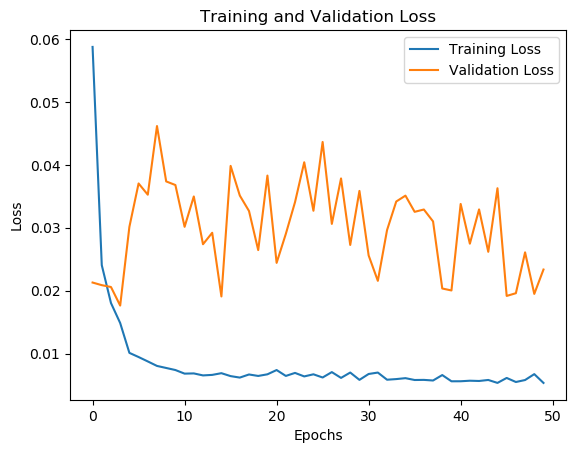

In [37]:
import matplotlib.pyplot as plt
import random

# 将模型和相关变量移到GPU
model = model.to(device)
criterion = criterion.to(device)

# 存储每个epoch的损失值
train_losses = []
val_losses = []

best_val_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    # 训练
    for X_batch, y_batch in train_loader:
        # 清除梯度
        optimizer.zero_grad()
        
        # 前向传播
        y_pred = model(X_batch)
        
        # 计算损失
        loss = criterion(y_pred, y_batch)
        total_loss += loss.item()
        
        # 反向传播和优化
        loss.backward()
        optimizer.step()
    
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # 验证
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for X_val, y_val in val_loader:
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)
            total_val_loss += val_loss.item()
    
    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # 保存最佳模型
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_model.pth')

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

# 绘制学习曲线
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


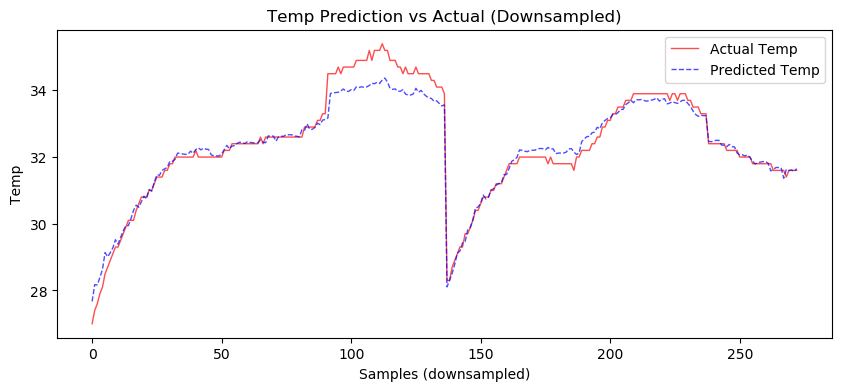

In [18]:
import matplotlib.pyplot as plt
model.load_state_dict(torch.load('best_model.pth'))
model = model.to(device)
model.eval()
actuals = []
predictions = []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        y_pred = model(X_batch)
        y_pred = y_pred.cpu().numpy()
        y_batch = y_batch.cpu().numpy()

        actuals.extend(y_batch)
        predictions.extend(y_pred)

# 将列表转换为NumPy数组
actuals = np.array(actuals)
predictions = np.array(predictions)

# 降采样数据以便在图表上更清晰地看到曲线
sample_rate = 100  # 每100个点取一个点
downsampled_actuals = actuals[::sample_rate, 0]*temp_std+temp_mean
downsampled_predictions = predictions[::sample_rate, 0]*temp_std+temp_mean

plt.figure(figsize=(10, 4))
plt.plot(downsampled_actuals, 'r-', label='Actual Temp', linewidth=1, alpha=0.7)
plt.plot(downsampled_predictions, 'b--', label='Predicted Temp', linewidth=1, alpha=0.7)
plt.title('Temp Prediction vs Actual (Downsampled)')
plt.xlabel('Samples (downsampled)')
plt.ylabel('Temp')
plt.legend()
plt.show()



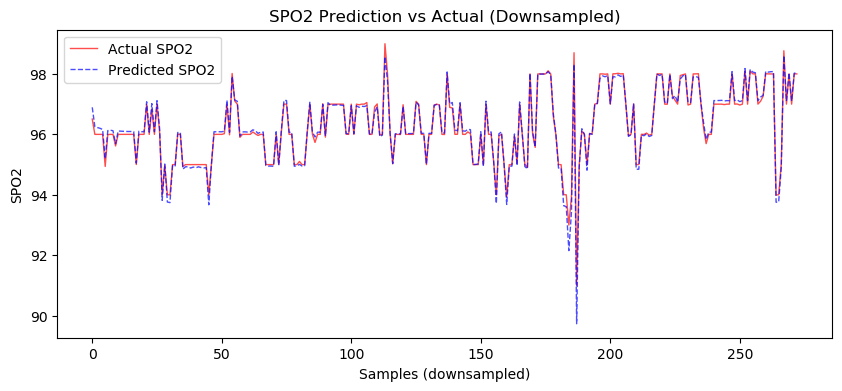

In [19]:
sample_rate = 100  # 每100个点取一个点
downsampled_actuals = actuals[::sample_rate, 1]*spo2_std+spo2_mean
downsampled_predictions = predictions[::sample_rate, 1]*spo2_std+spo2_mean

plt.figure(figsize=(10, 4))
plt.plot(downsampled_actuals, 'r-', label='Actual SPO2', linewidth=1, alpha=0.7)
plt.plot(downsampled_predictions, 'b--', label='Predicted SPO2', linewidth=1, alpha=0.7)
plt.title('SPO2 Prediction vs Actual (Downsampled)')
plt.xlabel('Samples (downsampled)')
plt.ylabel('SPO2')
plt.legend()
plt.show()

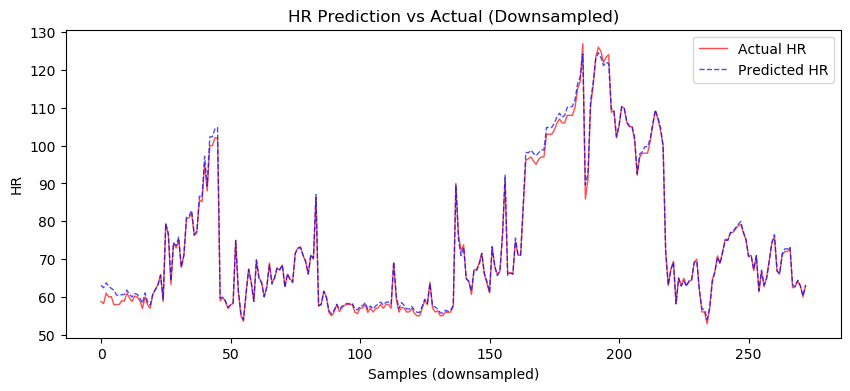

In [20]:
sample_rate = 100  # 每100个点取一个点
downsampled_actuals = actuals[::sample_rate, 2]*hr_std+hr_mean
downsampled_predictions = predictions[::sample_rate, 2]*hr_std+hr_mean

plt.figure(figsize=(10, 4))
plt.plot(downsampled_actuals, 'r-', label='Actual HR', linewidth=1, alpha=0.7)
plt.plot(downsampled_predictions, 'b--', label='Predicted HR', linewidth=1, alpha=0.7)
plt.title('HR Prediction vs Actual (Downsampled)')
plt.xlabel('Samples (downsampled)')
plt.ylabel('HR')
plt.legend()
plt.show()